**Итоговая аттестация**

Задача: 
Используя результаты выполнения практического кейса «Прогнозирование размеров сварного шва при электронно-лучевой сварке тонкостенных конструкций аэрокосмического назначения» разработать приложение, цель которого прогнозирование ширины и глубины сварного соединения. 

**«Прогнозирование размеров сварного шва при электронно-лучевой сварке тонкостенных конструкций аэрокосмического назначения»**

В качестве исходных данных были взяты результаты экспериментальных исследований, проводимых в целях улучшения технологического процесса электронно-лучевой сварки изделия, сборка которого состоит из элементов, состоящих из разнородного материала. Установка электронно-лучевой сварки, на которой проводились исследования, предназначена для сварки электронным лучом в глубоком вакууме деталей сборочных единиц из нержавеющих сталей, титановых, алюминиевых и специальных сплавов. Существующая установка электронно-лучевой сварки обеспечивает повторяемость режимов в рамках возможностей реализованной системы управления.

Работы по сварке выполнялись на образцах-имитаторах, соответствующих технологическому изделию. Для уменьшения вложения энергии при сварке:

1. Снижалась величина сварочного тока (IW);
2. Увеличивался ток фокусировки электронного пучка (IF);
3. Увеличивалась скорость сварки (VW);
4. Менялось расстояние от поверхности образцов до электронно-оптической системы (FP).

По совокупности параметров технологических режимов обеспечивались минимально возможные размеры сварных швов: глубина шва (Depth) и ширина шва (Width).

В процессе выполнения работ была произведена электронно-лучевая сварка 18-ти единиц образцов. Результаты металлографического контроля по размерам сварного шва для каждого образца проводились в 4-х поперечных сечениях сварного шва. Ускоряющее напряжение было постоянным в диапазоне 19,8 – 20 кВ.

Набор полученных данных собраны в составе режимов сварки, размеров сварочных швов в поперечных сечениях всех образцов. Статистические показатели набора обучающих данных указаны в табл. 1.

**Таблица 1. Статистические показатели набора обучающих данных**

| Показатель | IW   | IF   | VW   | FP   | Depth | Width |
|------------|------|------|------|------|-------|-------|
| Количество | 72   | 72   | 72   | 72   | 72    | 72    |
| Среднее выборочное | 45,666 | 141,333 | 8,639 | 78,333 | 1,196 | 1,970 |
| Среднее квадратичное отклонение | 1,678 | 5,146 | 2,061 | 21,494 | 0,225 | 0,279 |
| Минимум | 43   | 131  | 4,5  | 50   | 0,80  | 1,68  |
| 25%   | 44   | 139  | 8    | 60   | 1,08  | 1,76  |
| 50%   | 45   | 141  | 9    | 80   | 1,20  | 1,84  |
| 75%   | 47   | 146  | 10   | 80   | 1,29  | 2,05  |
| Максимум  | 49   | 150  | 12   | 125  | 1,76  | 2,60  |

**Задача:**
Решить задачу регрессии (одним или несколькими методами) для предсказания глубины и ширины сварного соединения, выполнив необходимые этапы (разведочный анализ, предобработка).

**Импорты**

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.metrics import R2Score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Normalization
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
import scipy.stats as stats
import pickle

%matplotlib inline

**Загрузка датасета**

In [8]:
df = pd.read_csv("ebw_data.csv")

**Изучение датасета**

In [10]:
df.columns # названия столбцов датасета

Index(['IW', 'IF', 'VW', 'FP', 'Depth', 'Width'], dtype='object')

In [12]:
df.head() #Возвращает первые n строк датасета (по умолчанию 5)

IW   IF   VW  FP  Depth  Width
0  47  139  4.5  80   1.60   2.54
1  47  139  4.5  80   1.62   2.50
2  47  139  4.5  80   1.68   2.60
3  47  139  4.5  80   1.58   2.52
4  45  140  4.5  80   1.76   2.48

In [14]:
df.sample(5) # Возвращает случайную выборку строк (в данном случае 5) датасета

IW   IF    VW   FP  Depth  Width
24  47  134  10.0  110   0.96   2.00
50  44  146   9.0   60   1.24   1.80
6   45  140   4.5   80   1.64   2.52
38  49  132   8.0  125   0.80   2.24
58  44  146   9.0   60   1.20   1.88

In [16]:
df.info() # базовая информация о наборе данных (количество строк, столбцов, тип данных представленных в датасете)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB


In [18]:
df.isna().sum() # пропусков в датасете нет

IW       0
IF       0
VW       0
FP       0
Depth    0
Width    0
dtype: int64

In [20]:
df.describe().T # описательная статистика датасета

count        mean        std     min     25%     50%     75%     max
IW      72.0   45.666667   1.678363   43.00   44.00   45.50   47.00   49.00
IF      72.0  141.333333   5.145763  131.00  139.00  141.00  146.00  150.00
VW      72.0    8.638889   2.061078    4.50    8.00    9.00   10.00   12.00
FP      72.0   78.333333  21.493530   50.00   60.00   80.00   80.00  125.00
Depth   72.0    1.195556   0.225081    0.80    1.08    1.20    1.29    1.76
Width   72.0    1.970417   0.279040    1.68    1.76    1.84    2.05    2.60

In [21]:
df.shape # показывает количество строк (72) и количество столбцов (6)

(72, 6)

**Разведочный анализ**

**Проверка выбросов в датасете**

<Axes: >

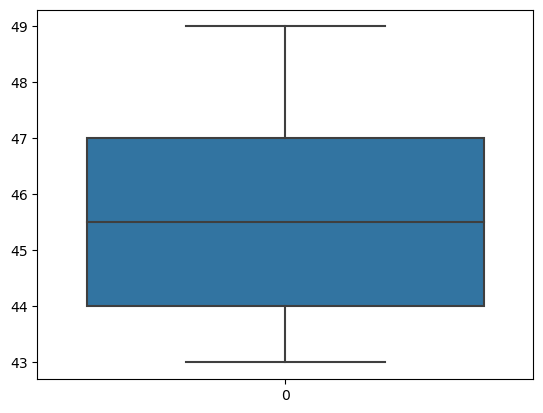

In [22]:
sns.boxplot(df['IW'])

<Axes: >

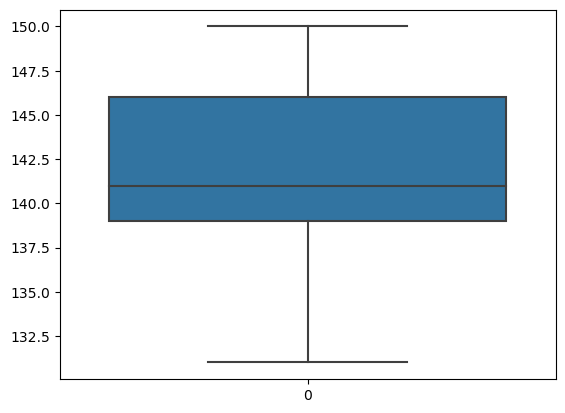

In [23]:
sns.boxplot(df['IF'])

<Axes: >

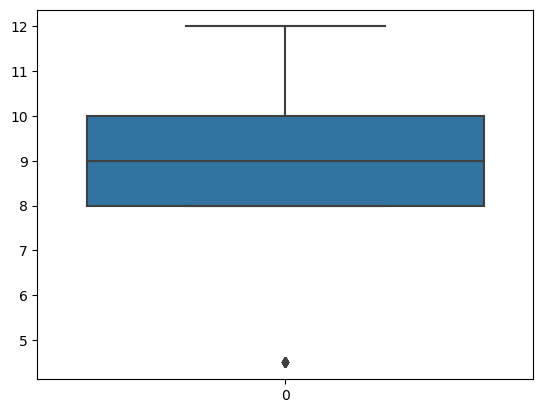

In [24]:
sns.boxplot(df['VW'])

<Axes: >

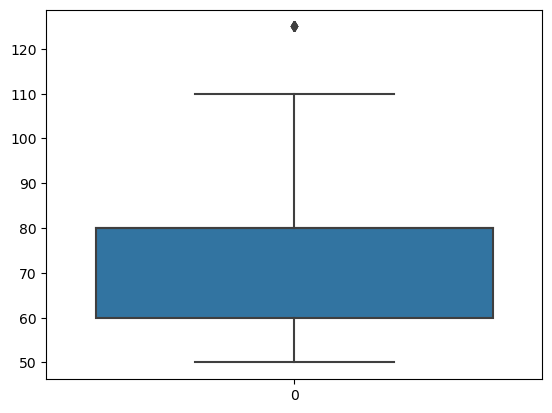

In [25]:
sns.boxplot(df['FP'])

<Axes: >

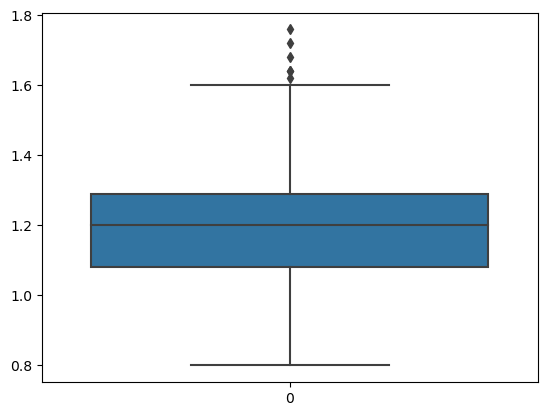

In [26]:
sns.boxplot(df['Depth'])

<Axes: >

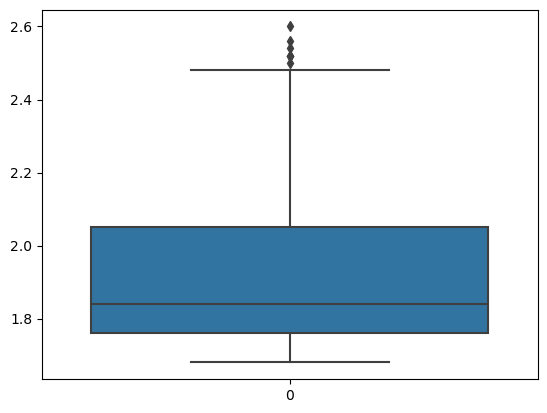

In [27]:
sns.boxplot(df['Width'])

**Больше всего выбросов наблюдается в значениях глубины шва (Depth) и ширины шва (Width). Так как данных в датасете мало, предлагается не удалять и не заменять выбросы.**

**Рассмотрим корреляционные признаки**

<Axes: >

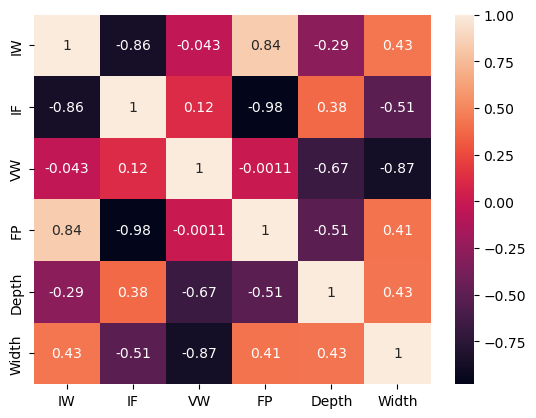

In [28]:
sns.heatmap(df.corr(), annot=True) # тепловая карта

**Исходя из тепловой карты видно следующее:
При снижении величины сварочного тока (IW) - увеличивался ток фокусировки электронного пучка (IF) (отрицательная корреляция -0.86).
При снижении величины сварочного тока (IW) - менялось расстояние от поверхности образцов до электронно-оптической системы (FP) (положительная корреляция 0.84).**

**При увеличении тока фокусировки электронного пучка (IF) - менялось расстояние от поверхности образцов до электронно-оптической системы (FP) (отрицательная корреляция -0.98).
При увеличении тока фокусировки электронного пучка (IF) - снижалась величина сварочного тока (IW) (отрицательная корреляция -0.86).**

**При увеличении скорости сварки (VW) - ширина шва уменьшалась (Width) (отрицательная корреляция -0.86) и наоборот при уменьшении скорости сварки (VW)- ширина шва увеличивалась (Width).**

**Наблюдается зависимость от увеличения скорости сварки (VW) и глубины шва (Depth) (отрицательная корреляция -0.67).**
**А также зависимость глубины шва (Depth) и изменения расстояние от поверхности образцов до электронно-оптической системы (FP) (отрицательная корреляция -0.51).**




    

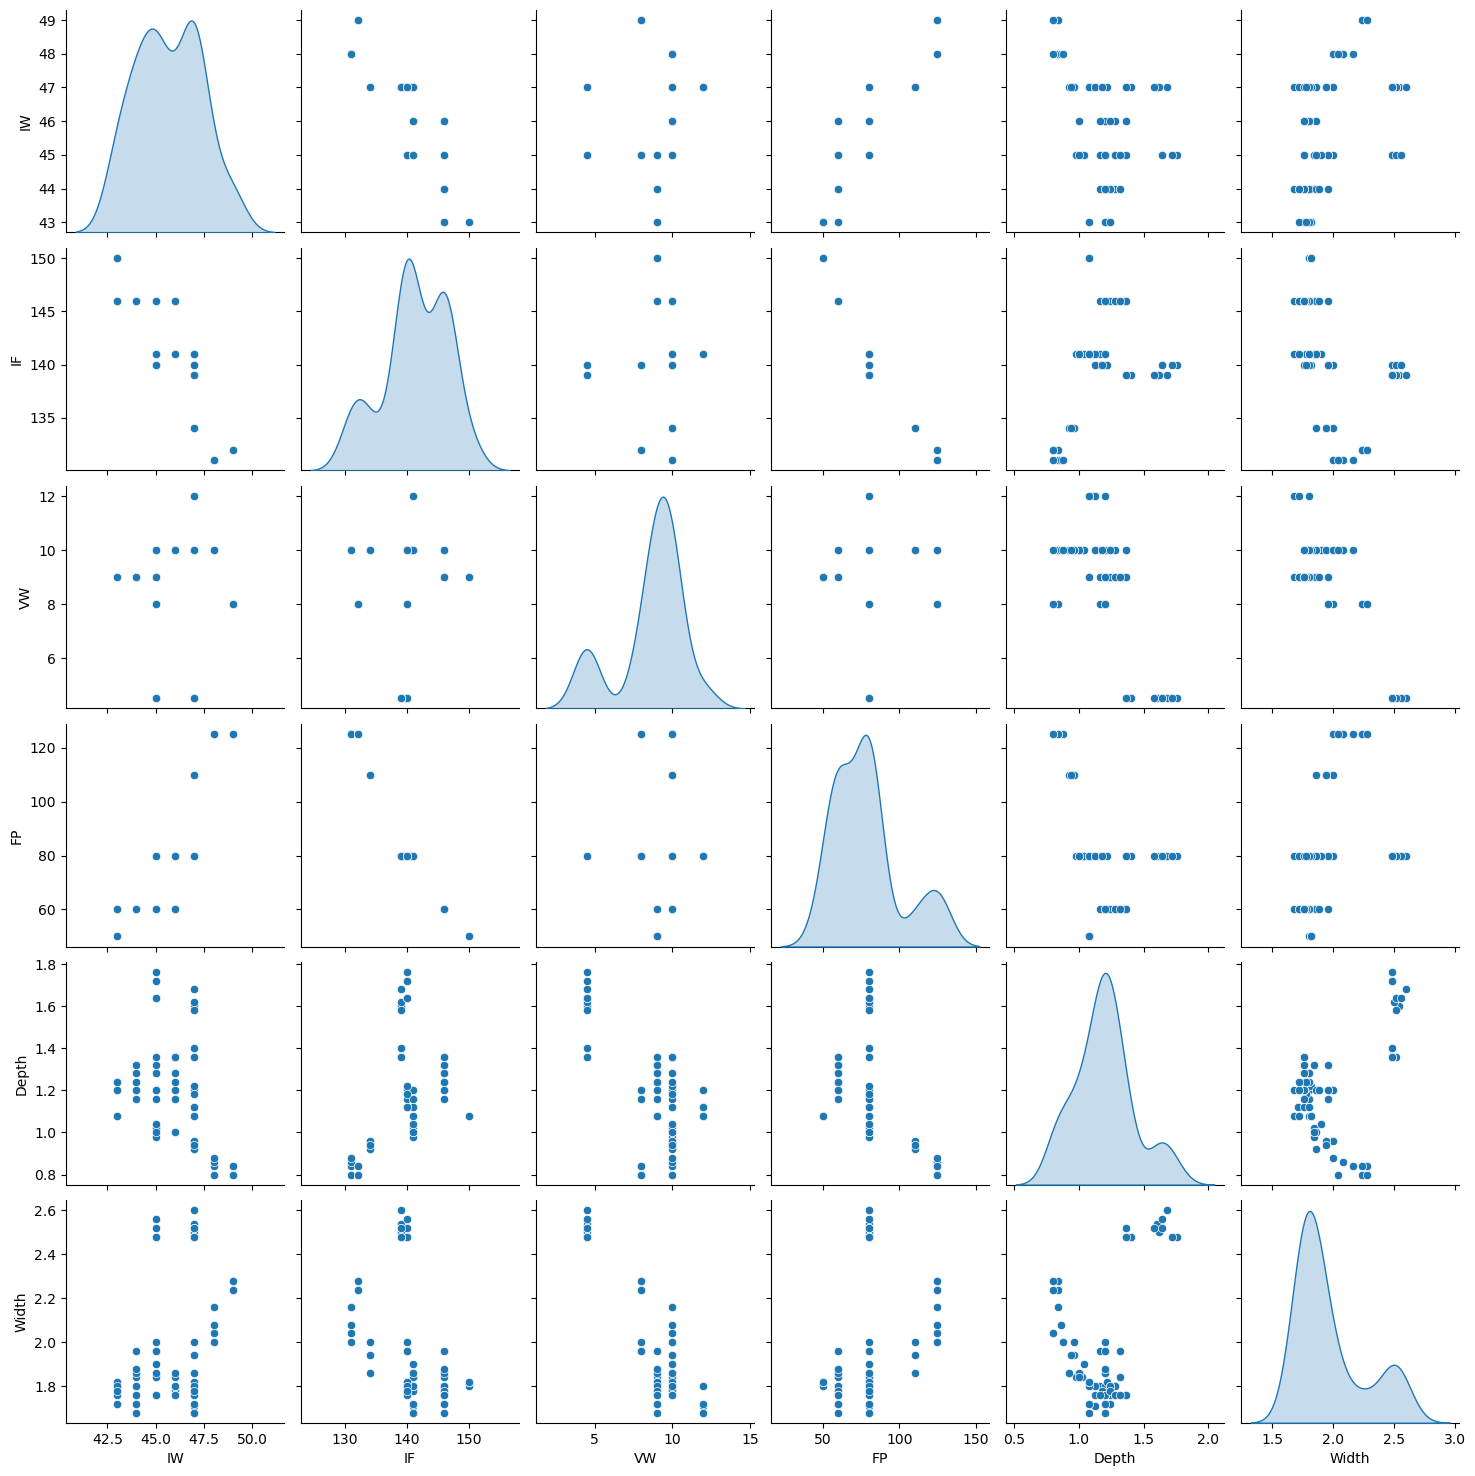

In [29]:
sns.pairplot(df, diag_kind='kde')

**Разбиваем данные на обучающую и тестовую выборки**

In [37]:
X = df.drop(["Width", "Depth"], axis=1)
Y = df[["Width", "Depth"]].copy()

X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.3, 
                                                    shuffle = True)

print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

X_train: (50, 4) Y_train: (50, 2)
X_test: (22, 4) Y_test: (22, 2)


**Линейная регрессия: LinearRegression**

In [46]:
l_regressor = LinearRegression()
l_regressor.fit(X_train, Y_train)

Y_pred = l_regressor.predict(X_test)

kf = KFold(n_splits=10)

scores = cross_val_score(l_regressor, 
                         X, 
                         Y, 
                         cv = kf,
                         scoring='neg_mean_squared_error')

MAE = metrics.mean_absolute_error(Y_test, l_regressor.predict(X_test), multioutput='raw_values')
MSE = metrics.mean_squared_error(Y_test, l_regressor.predict(X_test), multioutput='raw_values')
R2 = r2_score(Y_test, l_regressor.predict(X_test), multioutput='raw_values')

print('Линейная регрессия методом наименьших квадратов')
print('MAE глубины шва (Depth): ', round(MAE[0] * 100,1),'%')
print('MSE глубины шва (Depth): ', round(MSE[0] * 100,1),'%')
print("R2 глубины шва (Depth):", round(R2[0] * 100,1),'%')
print()
print('MAE ширины шва (Width): ', round(MAE[1] * 100,1),'%')
print('MSE ширины шва (Width): ', round(MSE[1] * 100,1),'%')
print("R2 ширины шва (Width):", round(R2[1] * 100,1),'%')


Линейная регрессия методом наименьших квадратов
MAE глубины шва (Depth):  5.6 %
MSE глубины шва (Depth):  0.5 %
R2 глубины шва (Depth): 93.7 %

MAE ширины шва (Width):  10.5 %
MSE ширины шва (Width):  1.7 %
R2 ширины шва (Width): 75.1 %


In [32]:
Y_pred

array([[ 0.89215314,  0.784731  ],
       [ 0.83339934,  0.64936369],
       [ 0.12552463,  0.38653358],
       [ 0.74481635,  0.10975731],
       [ 0.16436531,  0.32947922],
       [-0.06140233,  0.25892707],
       [ 0.1149378 ,  0.40696062],
       [ 0.1572609 ,  0.44496563],
       [ 0.199584  ,  0.48297063],
       [ 0.199584  ,  0.48297063],
       [ 0.89215314,  0.784731  ],
       [ 0.1572609 ,  0.44496563],
       [ 0.180796  ,  0.42684153],
       [ 0.1572609 ,  0.44496563],
       [ 0.74481635,  0.10975731],
       [ 0.199584  ,  0.48297063],
       [ 0.1149378 ,  0.40696062],
       [ 0.83339934,  0.64936369],
       [ 0.1572609 ,  0.44496563],
       [ 0.89215314,  0.784731  ],
       [ 0.1572609 ,  0.44496563],
       [ 0.74481635,  0.10975731]])

**Деревья регрессии : DecisionTreeRegression**

In [49]:
desc_tr = DecisionTreeRegressor(max_depth = None)

desc_tr.fit(X_train, Y_train)

Y_pred = desc_tr.predict(X_test)

scores = cross_val_score(desc_tr, 
                         X, 
                         Y, 
                         cv = kf,
                         scoring = 'neg_mean_squared_error')

print('Дерево решений')

MAE = metrics.mean_absolute_error(Y_test, desc_tr.predict(X_test), multioutput='raw_values')
MSE = metrics.mean_squared_error(Y_test, desc_tr.predict(X_test), multioutput='raw_values')
R2 = r2_score(Y_test, desc_tr.predict(X_test), multioutput='raw_values')

print('Линейная регрессия методом наименьших квадратов')
print('MAE глубины шва (Depth): ', round(MAE[0] * 100,1),'%')
print('MSE глубины шва (Depth): ', round(MSE[0] * 100,1),'%')
print("R2 глубины шва (Depth):", round(R2[0] * 100,1),'%')
print()
print('MAE ширины шва (Width): ', round(MAE[1] * 100,1),'%')
print('MSE ширины шва (Width): ', round(MSE[1] * 100,1),'%')
print("R2 ширины шва (Width):", round(R2[1] * 100,1),'%')


Дерево решений
Линейная регрессия методом наименьших квадратов
MAE глубины шва (Depth):  5.4 %
MSE глубины шва (Depth):  0.5 %
R2 глубины шва (Depth): 94.1 %

MAE ширины шва (Width):  5.8 %
MSE ширины шва (Width):  0.6 %
R2 ширины шва (Width): 90.9 %


In [50]:
Y_pred

array([[2.48      , 1.76      ],
       [2.48      , 1.76      ],
       [1.81111111, 1.22222222],
       [2.26666667, 0.81333333],
       [1.76      , 1.21333333],
       [1.76      , 1.29333333],
       [1.77333333, 1.29333333],
       [1.86666667, 1.02      ],
       [2.16      , 0.84      ],
       [1.82      , 1.08      ],
       [2.52666667, 1.54      ],
       [2.16      , 0.84      ],
       [1.81111111, 1.22222222],
       [2.16      , 0.84      ],
       [1.70333333, 1.09333333],
       [1.81111111, 1.22222222],
       [1.82      , 1.08      ],
       [1.9       , 0.93      ],
       [2.48      , 1.76      ],
       [1.97333333, 1.18666667],
       [1.9       , 0.93      ],
       [2.52666667, 1.54      ]])

In [51]:
pickle.dump(desc_tr, open('desc.pkl', 'wb'))

In [52]:
model_load = pickle.load(open('desc.pkl', 'rb'))

In [53]:
model_load.predict(X_test)

array([[2.48      , 1.76      ],
       [2.48      , 1.76      ],
       [1.81111111, 1.22222222],
       [2.26666667, 0.81333333],
       [1.76      , 1.21333333],
       [1.76      , 1.29333333],
       [1.77333333, 1.29333333],
       [1.86666667, 1.02      ],
       [2.16      , 0.84      ],
       [1.82      , 1.08      ],
       [2.52666667, 1.54      ],
       [2.16      , 0.84      ],
       [1.81111111, 1.22222222],
       [2.16      , 0.84      ],
       [1.70333333, 1.09333333],
       [1.81111111, 1.22222222],
       [1.82      , 1.08      ],
       [1.9       , 0.93      ],
       [2.48      , 1.76      ],
       [1.97333333, 1.18666667],
       [1.9       , 0.93      ],
       [2.52666667, 1.54      ]])

**Регрессия ближайших соседей: KNeighborsRegressor**


In [48]:
knn = KNeighborsRegressor(n_neighbors = 5)

knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

scores = cross_val_score(knn, 
                         X, 
                         Y, 
                         cv = kf,
                         scoring = 'neg_mean_squared_error')

MAE = metrics.mean_absolute_error(Y_test, knn.predict(X_test), multioutput='raw_values')
MSE = metrics.mean_squared_error(Y_test, knn.predict(X_test), multioutput='raw_values')
R2 = r2_score(Y_test, knn.predict(X_test), multioutput='raw_values')

print('Регрессия на основе k-ближайших соседей')
print('MAE глубины шва (Depth): ', round(MAE[0] * 100,1),'%')
print('MSE глубины шва (Depth): ', round(MSE[0] * 100,1),'%')
print("R2 глубины шва (Depth):", round(R2[0] * 100,1),'%')
print()
print('MAE ширины шва (Width): ', round(MAE[1] * 100,1),'%')
print('MSE ширины шва (Width): ', round(MSE[1] * 100,1),'%')
print("R2 ширины шва (Width):", round(R2[1] * 100,1),'%')

Регрессия на основе k-ближайших соседей
MAE глубины шва (Depth):  6.1 %
MSE глубины шва (Depth):  0.6 %
R2 глубины шва (Depth): 92.8 %

MAE ширины шва (Width):  7.4 %
MSE ширины шва (Width):  0.8 %
R2 ширины шва (Width): 88.8 %


**После рассмотрения 3-х регрессионных моделей (LinearRegression, DecisionTreeRegression, KNeighborsRegressor) считаю, что лучший результат показала модель DecisionTreeRegression.